# Truth Discovery example

## Continuous Versions

### DF-QuAD

In [6]:
import sys
sys.path.append("../")

from BAG import BAG
#### Import in BAG for Argument neeeds changing to BAG.Argument to run the reproduction

from semantics import QuadraticEnergyModel
from algorithms import RK4

# from plotting import strengthplot
from matplotlib import pyplot as plt

class ProductAggregation_ws:
    def __init__(self) -> None:
        pass

    def aggregate_strength(self, attackers, supporters, state):
        support_value = 1
        for a in attackers:
            support_value *= 1-state[a]

        attack_value = 1
        for s in supporters:
            attack_value *= 1-state[s]

        return support_value - attack_value

    def __str__(self) -> str:
        return __class__.__name__


def strengthplot(model, delta, epsilon, title="Untitled graph"):

    if (type(delta) != float and type(delta) != int):
        raise TypeError("delta must be a float or integer")

    if (type(epsilon) != float and type(epsilon) != int):
        raise TypeError("epsilon must be a float or integer")

    fig, ax = plt.subplots()
    graph_data = model.approximator.graph_data if hasattr(model, 'approximator') else model.graph_data
    for x in graph_data:
        x_values = [x[0] for x in graph_data[x]]
        y_values = [y[1] for y in graph_data[x]]
        ax.plot(x_values, y_values, label=x)

    ax.set_xlabel('Time (t)')  # Add an x-label to the axes.
    ax.set_ylabel('Strength (t)')  # Add a y-label to the axes.
    ax.set_title(title)  # Add a title to the axes.
    ax.legend()  # Add a legend.

    return plt

ContinuousModularModel, RK4
Time: 9.89999999999998
Argument(name=s1, weight=0.5, strength=0.9999118366275332)
Argument(name=s2, weight=0.5, strength=0.9999118366275332)
Argument(name=s3, weight=0.5, strength=0.998887713004957)
Argument(name=s4, weight=0.5, strength=0.998887713004957)
Argument(name=y58, weight=0.0, strength=0.9995751937627928)
Argument(name=y62, weight=0.0, strength=4.1288298317965045e-05)
Argument(name=pb, weight=0.0, strength=4.1288298317965045e-05)
Argument(name=pl, weight=0.0, strength=0.9995751937627928)



<module 'matplotlib.pyplot' from 'c:\\Users\\fabri\\Documents\\Repos\\gradaba\\Lib\\site-packages\\matplotlib\\pyplot.py'>

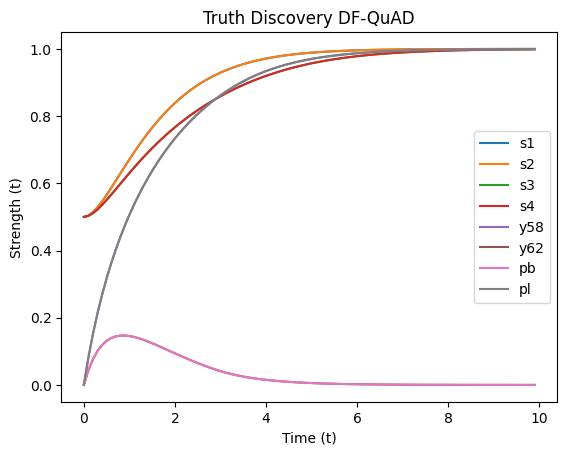

In [7]:
from semantics import modular
from semantics.ContinuousModularModel import ContinuousModularModel
# Iterative computation
model = ContinuousModularModel(ProductAggregation_ws(),  modular.LinearInfluence(conservativeness=1))
model.BAG = BAG("truth_disco.bag", cont=True)
model.approximator = RK4(model)

DELTA = 10e-2
EPSILON = 10e-4
model.solve(delta=DELTA, epsilon=EPSILON, verbose=True, generate_plot=True)

# for arg in model.BAG.arguments.values():
#     print((arg.name,arg.strength))

strengthplot(model, DELTA, EPSILON, "Truth Discovery DF-QuAD")

### Quadratic Energy

QuadraticEnergyModel, RK4
Time: 8.899999999999984
Argument(name=s1, weight=0.5, strength=0.8721688605431386)
Argument(name=s2, weight=0.5, strength=0.8721688605431386)
Argument(name=s3, weight=0.5, strength=0.7107620242585438)
Argument(name=s4, weight=0.5, strength=0.7107620242585438)
Argument(name=y58, weight=0.0, strength=0.8567572483683447)
Argument(name=y62, weight=0.0, strength=1.3518439360774931e-05)
Argument(name=pb, weight=0.0, strength=1.3518439360774931e-05)
Argument(name=pl, weight=0.0, strength=0.8567572483683447)



<module 'matplotlib.pyplot' from 'c:\\Users\\fabri\\Documents\\Repos\\gradaba\\Lib\\site-packages\\matplotlib\\pyplot.py'>

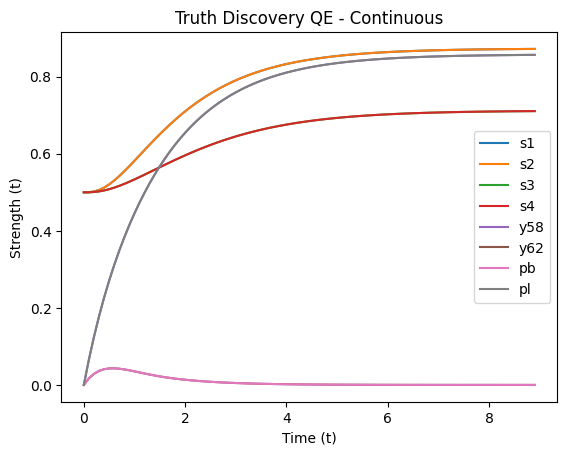

In [8]:
#from uncertainpy.argumentation.graphing import graph

model = QuadraticEnergyModel()
model.approximator = RK4(model)
model.BAG = BAG("truth_disco.bag", cont=True)

DELTA = 10e-2
EPSILON = 10e-4

model.solve(delta=DELTA, epsilon=EPSILON, verbose=True, generate_plot=True)
strengthplot(model, DELTA, EPSILON, "Truth Discovery QE - Continuous")

## Discrete Versions

### Df-QuAD

<module 'matplotlib.pyplot' from 'c:\\Users\\fabri\\Documents\\Repos\\gradaba\\Lib\\site-packages\\matplotlib\\pyplot.py'>

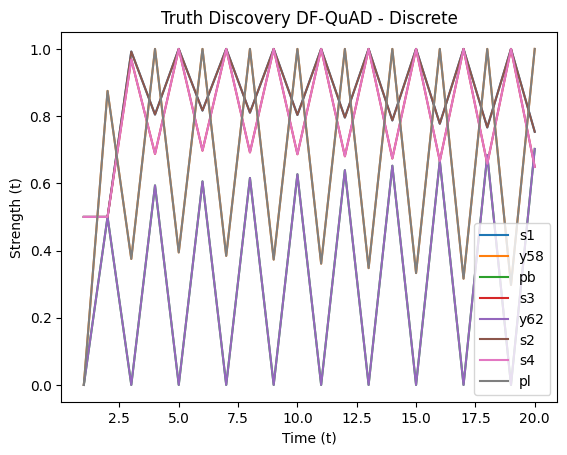

In [9]:
import sys
sys.path.append("../")

from BAG import BAG

# from plotting import strengthplot

from BSAF import BSAF
from BSAF.Argument import Argument
from ABAF.Assumption import Assumption
from semantics.bsafDiscreteModular import DiscreteModular
from semantics.modular.EulerBasedInfluence import EulerBasedInfluence
from semantics.modular.LinearInfluence import LinearInfluence
from semantics.modular.ProductAggregation import ProductAggregation
from semantics.modular.SetProductAggregation import SetProductAggregation
from semantics.modular.SetSumAggregation import SetSumAggregation



bag = BAG("truth_disco.bag", cont=True)


### Create the BSAF from the BAG

## define assumptions from the arguments keys and initial strengths
assumptions = [Assumption(arg) for arg in bag.arguments]

## retrieve the initial strengths from the arguments
for asm in assumptions:
    asm.initial_weight = bag.arguments[asm.name].strength

bsaf_args = [Argument(name=arg) for arg in bag.arguments]
for arg in bsaf_args:
    ## set the initial strength of the argument
    arg.initial_weight = bag.arguments[arg.name].strength

### Define the BSAF
bsaf = BSAF(bsaf_args, assumptions)

for sup in bag.supports:
    ## check that the support is coming from only one assumption
    if sup.supporter.name in [asm.name for asm in assumptions]:
        ## get the argument from the BSAF
        suptr = [arg for arg in bsaf.arguments if arg.name == sup.supporter.name]
        suptd = [arg for arg in bsaf.arguments if arg.name == sup.supported.name][0]
        ## add the support to the BSAF
        bsaf.add_support(suptr, suptd)
        # print(f"Support from {suptd.name} to {suptr[0].name}")
    else:
        print("Support is not coming from only one assumption")

for att in bag.attacks:
    ## check that the attack is coming from only one assumption
    if att.attacker.name in [asm.name for asm in assumptions]:
        ## get the argument from the BSAF
        attr = [arg for arg in bsaf.arguments if arg.name == att.attacker.name]
        attd = [arg for arg in bsaf.arguments if arg.name == att.attacked.name][0]
        ## add the attack to the BSAF
        bsaf.add_attack(attr, attd)
        # print(f"Attack from {attd.name} to {attr[0].name}")
    else:
        print("Attack is not coming from only one assumption")


model = DiscreteModular(BSAF=bsaf, aggregation=ProductAggregation(), 
                        influence=LinearInfluence(conservativeness=1), 
                        set_aggregation=SetSumAggregation())

model.solve(20, generate_plot=True)

strengthplot(model, 1, 1, "Truth Discovery DF-QuAD - Discrete")

### Does it converge if we consider acyclic frameworks?

## Flat ABA - should converge all
## Convergence of random instances 
## How many outer loops until we get stuck in the inner loop?


### QE

<module 'matplotlib.pyplot' from 'c:\\Users\\fabri\\Documents\\Repos\\gradaba\\Lib\\site-packages\\matplotlib\\pyplot.py'>

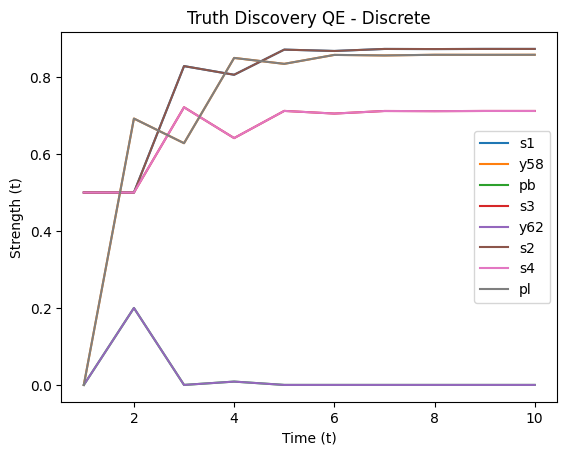

In [10]:
# print(bsaf)

from semantics.modular import SumAggregation
from semantics.modular import QuadraticMaximumInfluence

model2 = DiscreteModular(BSAF=bsaf, aggregation=SumAggregation(), 
                        influence=QuadraticMaximumInfluence(conservativeness=1), 
                        set_aggregation=SetSumAggregation())

model2.solve(10, generate_plot=True)

strengthplot(model2, 1, 1, "Truth Discovery QE - Discrete")